In [1]:
pip install zepid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.8/555.8 kB 8.0 MB/s eta 0:00:00


In [3]:
# Librerias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#Odds ratio
from zepid import RiskRatio
from scipy.stats import norm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#BASE DE DATOS
Se tomó una muestra de 9702 clientes seleccionados aleatoriamente, del total de  la clientela de una empresa telefónica, la que se clasificó en dos grupos:

1)Clientes que permanecen en la empresa

2)Clientes que abandonan el servicio, en un período mensual determinado

Objetivo empresarial: detectar clientes que van a abandonar el servicio

In [5]:
df = pd.read_excel("/content/drive/MyDrive/Data Analitycs/Introducción al aprendizaje automático/Bases de datos/emp_telefonica.xls")


In [ ]:
df.head(10)

,prom_act,d_edad,d_fincon,porc_des,hist_p,d_durac,tprom4_2,mmodelo,tdeuda,region_3,adquisi1,rest_ag1,rtip_cta,restado
0,10,491,239,0,1,3,1,1,1,1,3,1,1,0
1,3,485,245,0,1,3,3,3,1,1,3,2,3,0
2,12,469,261,0,4,3,2,2,2,1,3,3,3,0
3,32,436,294,0,1,3,1,1,1,1,1,3,3,0
4,19,403,327,0,1,3,2,1,1,1,1,2,3,0
5,10,400,330,0,1,3,1,3,1,1,3,2,3,1
6,64,173,557,0,5,3,3,1,3,1,2,1,3,1
7,41,359,371,0,1,3,2,1,1,1,3,2,1,0
8,84,321,409,0,3,3,1,1,2,1,2,2,3,0
9,44,305,425,0,1,3,1,1,1,1,1,2,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   prom_act  9702 non-null   int64
 1   d_edad    9702 non-null   int64
 2   d_fincon  9702 non-null   int64
 3   porc_des  9702 non-null   int64
 4   hist_p    9702 non-null   int64
 5   d_durac   9702 non-null   int64
 6   tprom4_2  9702 non-null   int64
 7   mmodelo   9702 non-null   int64
 8   tdeuda    9702 non-null   int64
 9   region_3  9702 non-null   int64
 10  adquisi1  9702 non-null   int64
 11  rest_ag1  9702 non-null   int64
 12  rtip_cta  9702 non-null   int64
 13  restado   9702 non-null   int64
dtypes: int64(14)
memory usage: 1.0 MB


#Descripción de las variables

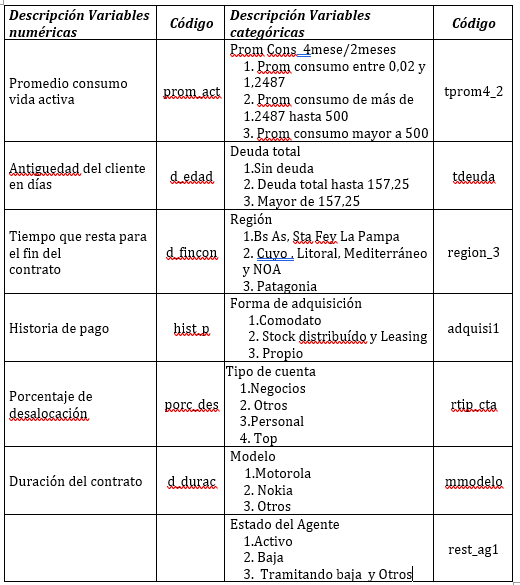

In [6]:
## cambiar el tipo de variable
df['tprom4_2']= df['tprom4_2'].astype(object)
df['mmodelo']= df['mmodelo'].astype(object)
df['tdeuda']= df['tdeuda'].astype(object)
df['region_3']= df['region_3'].astype(object)
df['adquisi1']= df['adquisi1'].astype(object)
df['rtip_cta']= df['rtip_cta'].astype(object)
df['rest_ag1']= df['rest_ag1'].astype(object)
df['restado']= df['restado'].astype(object)

In [12]:
## Asignar etiquetas a las categorías de las variables
df['tprom4_2'].replace({1:"De 0,02 a 1,2487",2:"Más de 1,2487 a 500", 3:"Mayor a 500"}, inplace=True)
df['mmodelo'].replace({1:"Motorola",2:"Nokia", 3:"Otros"}, inplace=True)
df['tdeuda'].replace({1:"Sin deuda",2:"hasta 157,25", 3:"Mayor a 157,25"}, inplace=True)
df['region_3'].replace({1:"Bs As, Sta Fe y La Pampa",2:"Resto", 3:"Patagonia"}, inplace=True)
df['adquisi1'].replace({1:"Comodato",2:"Dist.y Leasing", 3:"Propio"}, inplace=True)
df['rtip_cta'].replace({1:"Negocios",2:"Otros", 3:"Personal",4:"Top"}, inplace=True)
df['rest_ag1'].replace({1:"Activo",2:"Baja", 3:"Tramita baja y OE"}, inplace=True)
df['restado'].replace({0:"ACTIVO",1:"CANCELADO"}, inplace=True)

In [ ]:
 df.describe()

,prom_act,d_edad,d_fincon,porc_des,hist_p,d_durac
count,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000
mean,177.512884,439.861575,325.505154,0.205215,2.763245,2.726860
std,768.947957,219.365347,185.911912,0.731041,2.218020,0.641822
min,0.000000,122.000000,0.000000,0.000000,1.000000,1.000000
25%,31.000000,232.000000,173.000000,0.000000,1.000000,3.000000
50%,84.000000,433.000000,324.000000,0.000000,2.000000,3.000000
75%,194.000000,594.000000,499.000000,0.000000,4.000000,3.000000
max,61860.000000,1125.000000,729.000000,16.000000,7.000000,3.000000


In [8]:
## transformar las variables categóricas en varias variables dicotómicas ( variables dummies).
df_dum = pd.get_dummies(df)

In [ ]:
df_dum.head(10)

,prom_act,d_edad,d_fincon,porc_des,hist_p,d_durac,"tprom4_2_De 0,02 a 1,2487",tprom4_2_Mayor a 500,"tprom4_2_Más de 1,2487 a 500",mmodelo_Motorola,...,adquisi1_Propio,rest_ag1_Activo,rest_ag1_Baja,rest_ag1_Tramita baja y OE,rtip_cta_Negocios,rtip_cta_Otros,rtip_cta_Personal,rtip_cta_Top,restado_ACTIVO,restado_CANCELADO
0,10,491,239,0,1,3,1,0,0,1,...,1,1,0,0,1,0,0,0,1,0
1,3,485,245,0,1,3,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
2,12,469,261,0,4,3,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,32,436,294,0,1,3,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,19,403,327,0,1,3,0,0,1,1,...,0,0,1,0,0,0,1,0,1,0
5,10,400,330,0,1,3,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
6,64,173,557,0,5,3,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
7,41,359,371,0,1,3,0,0,1,1,...,1,0,1,0,1,0,0,0,1,0
8,84,321,409,0,3,3,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
9,44,305,425,0,1,3,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1


**Se pide:**

Estimar un modelo predictivo para determinar la probabilidad de que un cliente cancele el servicio de telefonía.



In [ ]:
#Tabla de frecuencia
fabs=pd.value_counts(df['restado'])
frel=100 * df['restado'].value_counts() / len(df['restado'])
tf_est=pd.DataFrame(fabs)
tf_est["frel"]=frel
tf_est.columns = ["Frec_Abs","Frec_Rel_(%)"]
tf_est

,Frec_Abs,Frec_Rel_(%)
ACTIVO,5712,58.874459
CANCELADO,3990,41.125541


<Axes: ylabel='restado'>

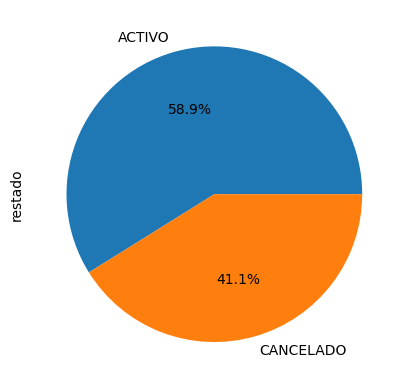

In [ ]:
#Gráfico de torta para mostrar frecuencia
frel.plot.pie(autopct='%1.1f%%')

In [14]:
#Recategorizar contenido de columna restado
df['restado'] = df['restado'].apply(lambda x: 1 if x == 'CANCELADO' else 0)

In [17]:
#Modelo logistico explicativo en statmodels
modelo = smf.logit(formula = 'restado ~ tprom4_2+mmodelo+tdeuda+region_3+adquisi1+rtip_cta+rest_ag1+prom_act+d_edad+d_fincon+porc_des+hist_p+d_durac', data = df)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.313878
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                restado   No. Observations:                 9702
Model:                          Logit   Df Residuals:                     9680
Method:                           MLE   Df Model:                           21
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.5366
Time:                        16:31:19   Log-Likelihood:                -3045.2
converged:                       True   LL-Null:                       -6571.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           2.8316      0.385      7.350  

In [43]:
#Calculo de Odds ratio
modelo.params
np.exp(modelo.params)


Intercept                          16.971765
tprom4_2[T.Mayor a 500]             6.209912
tprom4_2[T.Más de 1,2487 a 500]     1.571297
mmodelo[T.Nokia]                    1.474092
mmodelo[T.Otros]                    0.962189
tdeuda[T.Sin deuda]                 0.347252
tdeuda[T.hasta 157,25]              0.166780
region_3[T.Patagonia]               1.665268
region_3[T.Resto]                   1.261659
adquisi1[T.Dist.y Leasing]          0.807852
adquisi1[T.Propio]                  1.597906
rtip_cta[T.Otros]                   0.498709
rtip_cta[T.Personal]                0.776573
rtip_cta[T.Top]                     0.195950
rest_ag1[T.Baja]                    2.129638
rest_ag1[T.Tramita baja y OE]       1.540625
prom_act                            1.000756
d_edad                              0.993598
d_fincon                            0.998775
porc_des                            1.355946
hist_p                              1.881066
d_durac                             0.467656
dtype: flo

In [30]:
#Modelo logistico de predicción con Sklearn

## seleccionamos las variables para hacer el análisis elimianado las que no vamos a utilizar
X=df_dum.loc[:,~df_dum.columns.isin(["restado_CANCELADO", "restado_ACTIVO"])] #variables clasificadoras (features)
y=df_dum.restado_CANCELADO # grupo (target)

# Split the data to 60-40

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

pd.value_counts(df_dum['restado_CANCELADO'])


0    3427
1    2394
Name: restado_CANCELADO, dtype: int64
0    2285
1    1596
Name: restado_CANCELADO, dtype: int64


0    5712
1    3990
Name: restado_CANCELADO, dtype: int64

In [31]:
#Se ajusta el modelo de entrenamiento
logr=LogisticRegression(max_iter=1000)
logr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
#Probabilidad de ser clasificado como Cancelado (1) o Activo (0)
predicciones = logr.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = logr.classes_)
predicciones.head(10)

,0,1
0,0.000867,0.999133
1,0.346645,0.653355
2,0.625705,0.374295
3,0.876105,0.123895
4,0.919375,0.080625
5,0.870644,0.129356
6,0.827364,0.172636
7,0.898563,0.101437
8,0.964788,0.035212
9,0.001599,0.998401


In [33]:
# Prediccion de los grupos en la muestra test
y_pred_logr = logr.predict(X_test)
print('--------------------')
print('Tabla de reporte completa')
print('-------------------')
print(classification_report(y_test,y_pred_logr, digits = 3))
print('--------------------')
print('Tabla de confusión')
print('-------------------')
CM = confusion_matrix(y_test,y_pred_logr)  # Matriz de confusión
print(CM)
print('--------------------')
print('Reporte de medidas de desempeño')
print('-------------------')
print('accuracy: ', accuracy_score(y_test,y_pred_logr))

--------------------
Tabla de reporte completa
-------------------
              precision    recall  f1-score   support

           0      0.872     0.939     0.904      2285
           1      0.902     0.803     0.849      1596

    accuracy                          0.883      3881
   macro avg      0.887     0.871     0.877      3881
weighted avg      0.884     0.883     0.882      3881

--------------------
Tabla de confusión
-------------------
[[2146  139]
 [ 315 1281]]
--------------------
Reporte de medidas de desempeño
-------------------
accuracy:  0.8830198402473589


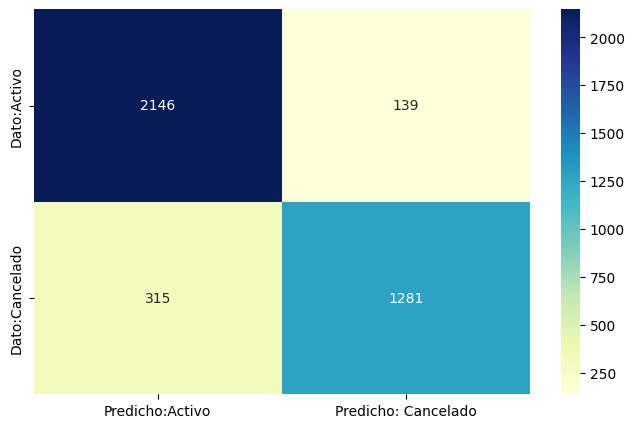

In [34]:
#Matriz de confusión
conf_matrix=pd.DataFrame(data=CM,columns=['Predicho:Activo','Predicho: Cancelado'],index=['Dato:Activo','Dato:Cancelado'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

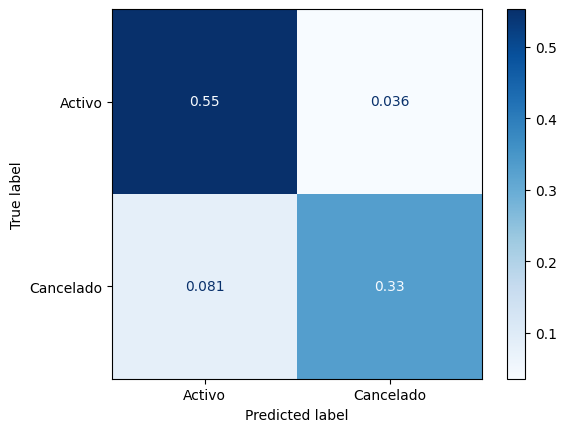

In [35]:
#Matriz de confusión con proporciones
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_logr, display_labels=['Activo', 'Cancelado'],normalize='all',cmap='Blues')
plt.show()

In [42]:
#Sensibilidad y especificidad
VN=CM[0,0]
VP=CM[1,1]
FN=CM[1,0]
FP=CM[0,1]
sensibilidad=VP/float(VP+FN)
especificidad=VN/float(VN+FP)

print("Sensibilidad")
print(sensibilidad)
print("Especificidad")
print(especificidad)


Sensibilidad
0.8026315789473685
Especificidad
0.9391684901531728


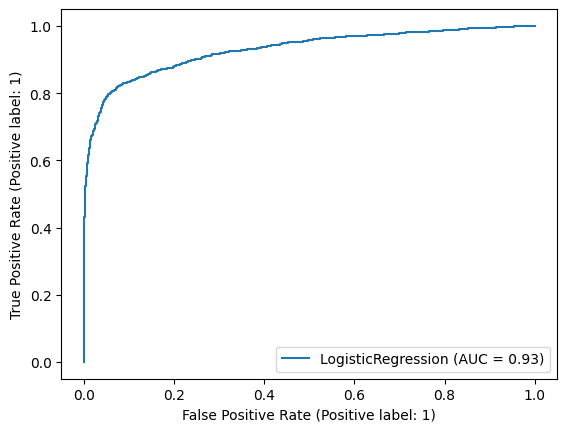

In [36]:
#Gráfico de curva ROC
roc = RocCurveDisplay.from_estimator(logr ,X_test, y_test, response_method ='decision_function')
plt.show(roc)